In [1]:
import numpy as np
import pandas as pd
import re, string

#import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.cluster import KMeans

from joblib import dump, load
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# --- Stopwords
PRINTABLE = [i for i in string.printable]
GENREIC = ["ain't", "aren't", "can't", "can't've", "'cause", "could've", "couldn't", "couldn't've", "didn't", "doesn't", "don't", "hadn't", "hadn't've", "hasn't", "haven't", "he'd", "he'd've", "he'll", "he'll've", "he's", "how'd", "how'd'y", "how'll", "how's", "i'd", "i'd've", "i'll", "i'll've", "i'm", "i've", "isn't", "it'd", "it'd've", "it'll", "it'll've", "it's", "let's", "ma'am", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "o'clock", "oughtn't", "oughtn't've", "shan't", "sha'n't", "shan't've", "she'd", "she'd've", "she'll", "she'll've", "she's", "should've", "shouldn't", "shouldn't've", "so've", "so's", "that'd", "that'd've", "that's", "there'd", "there'd've", "there's", "they'd", "they'd've", "they'll", "they'll've", "they're", "they've", "to've", "wasn't", "we'd", "we'd've", "we'll", "we'll've", "we're", "we've", "weren't", "what'll", "what'll've", "what're", "what's", "what've", "when's", "when've", "where'd", "where's", "where've", "who'll", "who'll've", "who's", "who've", "why's", "why've", "will've", "won't", "won't've", "would've", "wouldn't", "wouldn't've", "y'all", "y'all'd", "y'all'd've", "y'all're", "y'all've", "you'd", "you'd've", "you'll", "you'll've", "you're", "you've", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
SUBJECT_RELATED = ['cookbook', 'cookbooks', 'book', 'books', 'recipes', 'like', 'copyright', 'information']
MISC_STOPWORDS = ['com', 'xa']
ADD_STOPWORDS = ["'caus", "'d", "'ll", "'m", "'re", "'s", "'ve", 'abov', 'afterward', 'ai', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'ca', 'cri', 'describ', 'did', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifi', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'inform', 'latterli', 'let', 'mani', 'meanwhil', 'moreov', 'mostli', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ought', 'ourselv', 'perhap', 'pleas', 'recip', 'seriou', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv']
COOKBOOK_STOPWORDS = PRINTABLE + GENREIC + SUBJECT_RELATED + MISC_STOPWORDS + ADD_STOPWORDS

VECTORIZATION = {
    'count': CountVectorizer,
    'tfidf': TfidfVectorizer
}

DIMENSIONALITY_REDUCTION = {
    'PCA': PCA,
    'LSA': TruncatedSVD,
    'NMF': NMF,
    'LDA': LatentDirichletAllocation
}

CLUSTERING = {
    'kmeans': KMeans
}

##########################################################################
# --- Helper Classes
class nlp_model:
    """
    
    #--- Parameters and thier defaults if applicable:
    vect_method = "count"
    dim_reduc="LSA"
    clustering="kmeans"
    n_components = 21
    n_clusters=6
                           
    #--- Attributes:
    self.dataNLP
    self.methods = A dictionary of strings representing pipeline of methods used for NLP model
        example: self.methods is {'Vectorization': 'count',
                                  'Dimensionality Reduction': 'LSA',
                                  'Clustering': 'kmeans'
                                  }                             
    self.objects = A dictionary of objects representing instances of methods used for NLP model
        created as part of the model fit self.fit() method
    self.outputs = A dictionary of primary outputs of pipeline used for NLP model
        created as part of the model fit self.fit() method
    self.n_components = number of components for dimensionality reduction
    self.n_clusters = number of clusters for clustering algorithm (might change with other
                      clustering algorithm inclusions in the future)
    
    #--- Methods:
    
    """
    
    def __init__(self, vect_method = "count", dim_reduc="LSA", clustering="kmeans",
                 n_components = 21, n_clusters=6):
        """
        """
        #self.doc_text = data
        
        ##########################################################################
        #--- Create self.methods attribute from the class parameters
        self.methods = {}
        
        # --- Token Vectorization Methods
        if vect_method == "tfidf":
            self.methods['Vectorization'] = vect_method
        else:
            self.methods['Vectorization'] = "count"
            
        # --- Dimensionality Reduction Methods
        if dim_reduc == "PCA" or dim_reduc == "NMF" or dim_reduc == "LDA":
            self.methods['Dimensionality Reduction'] = dim_reduc
        else:
            self.methods['Dimensionality Reduction'] = "LSA"
        
        # --- Clustering Methods (Only kmeans at the moment. Expand based on need)
        if clustering == "kmeans":
            self.methods['Clustering'] = clustering
        else:
            self.methods['Clustering'] = "kmeans"
        
        ##########################################################################
        # --- number of components for dimensionality reduction
        self.n_components = n_components
        
        # --- number of clusters for clustering
        self.n_clusters = n_clusters
        
    def fit(self, data, save_fit = False, filename = None):
        """
        Function to fit the model using the data from the arguments
        Runs through the pipeline as defined in the object instantiation
        
        Argutments:
        data - nlp data in docs X 1 format, and should be readable by vectorization method
        
        Returns: None object
        """
        ##########################################################################
        # --- Get temp methods, once instantiated will be saved under self.objects
        to_vect = VECTORIZATION[self.methods['Vectorization']]
        to_dim_reduce = DIMENSIONALITY_REDUCTION[self.methods['Dimensionality Reduction']]
        to_cluster = CLUSTERING[self.methods['Clustering']]
        
        ##########################################################################
        self.dataNLP = data
        
        self.objects = {}
        self.outputs = {}
        
        #--- Vectorization step
        self.objects['Vectorization'] =  to_vect(stop_words=COOKBOOK_STOPWORDS, tokenizer=textblob_tokenizer)
        vect_data = self.objects['Vectorization'].fit_transform(self.dataNLP)
        self.outputs['Vectorization'] = vect_data.toarray()
        
        #--- Dimensionality Reduction step
        self.objects['Dimensionality Reduction'] = to_dim_reduce(n_components=self.n_components)
        self.outputs['Dimensionality Reduction'] = self.objects['Dimensionality Reduction'].fit_transform(self.outputs['Vectorization'])
        
        #--- Clustering step
        self.objects['Clustering'] = to_cluster(n_clusters=self.n_clusters, random_state=30)
        self.objects['Clustering'].fit(self.outputs['Dimensionality Reduction'])
        self.outputs['Clustering'] = self.objects['Clustering'].labels_
        
        if save_fit and filename:
            dump(self, filename)
        
        
##########################################################################
# --- Helper Functions

# Use TextBlob
# credit: http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# --- To plot n-dimensional data 
def plot_all_dimensions(data, class_labels, title=""):
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    dims = data.shape[1]
    assert dims <= 6
    
    count = 1
    for dim in range(dims):
        i = dim
        j = (i+1) * int(dim != dims-1)
        
        plt.subplot(2,3, count)
        plt.scatter(data[:,i], data[:,j],# ckbk_space[vect][dr][:,2],
                   s = 4, alpha = 0.5, c=class_labels)
        plt.title(title, fontsize=20, color='red')
        count += 1
    plt.show()
    
    
# --- Parser for reading in the Amazon json files (can be used for both reviews and metadata)
# --- credits folloing parse() method to Julian McAuley UCSD: http://jmcauley.ucsd.edu/data/amazon/ 
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield json.loads(l)
        

In [9]:
ckbks_test = load("../model/chking_classes_textblob.joblib")
print(type(ckbks_test))

<class '__main__.nlp_model'>


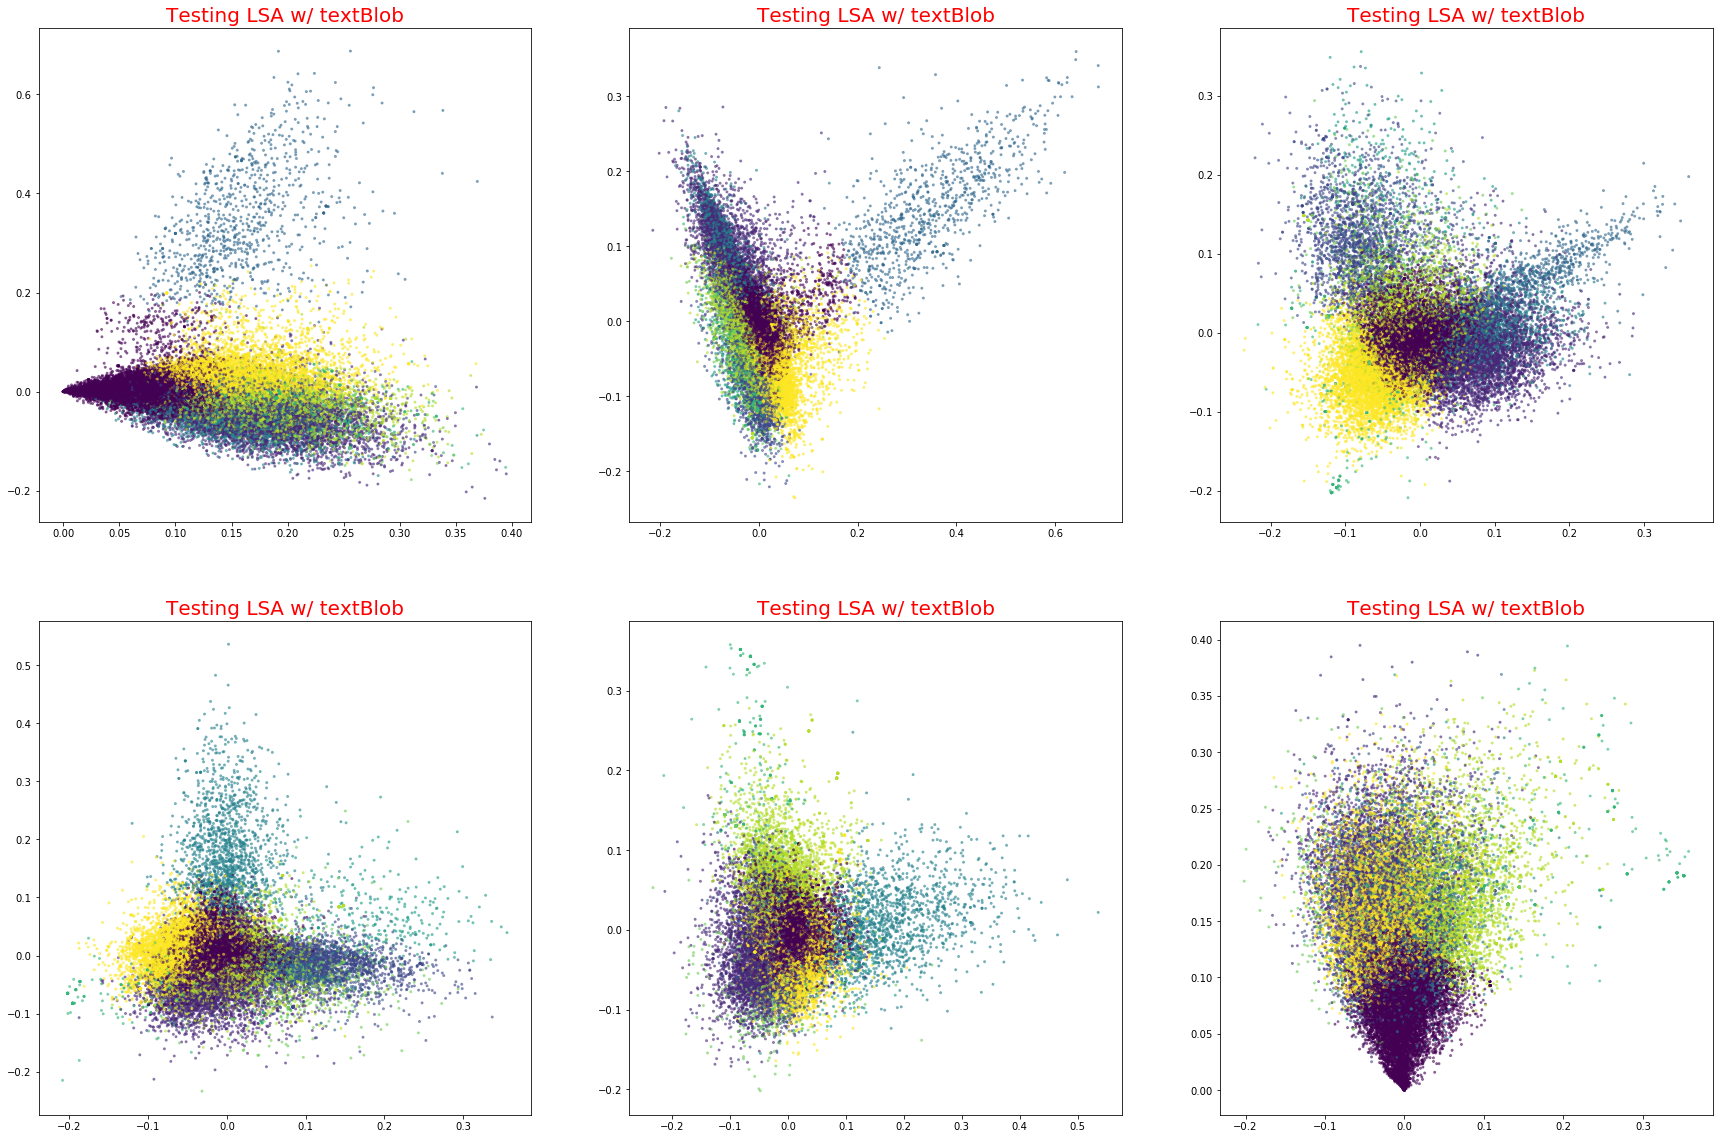

29929


In [11]:
data_dr = ckbks_test.outputs['Dimensionality Reduction']
labels = ckbks_test.outputs['Clustering']
plot_all_dimensions(data_dr[:,:6], labels, title="Testing LSA w/ textBlob")
print(len(ckbks_test.outputs["Clustering"]))

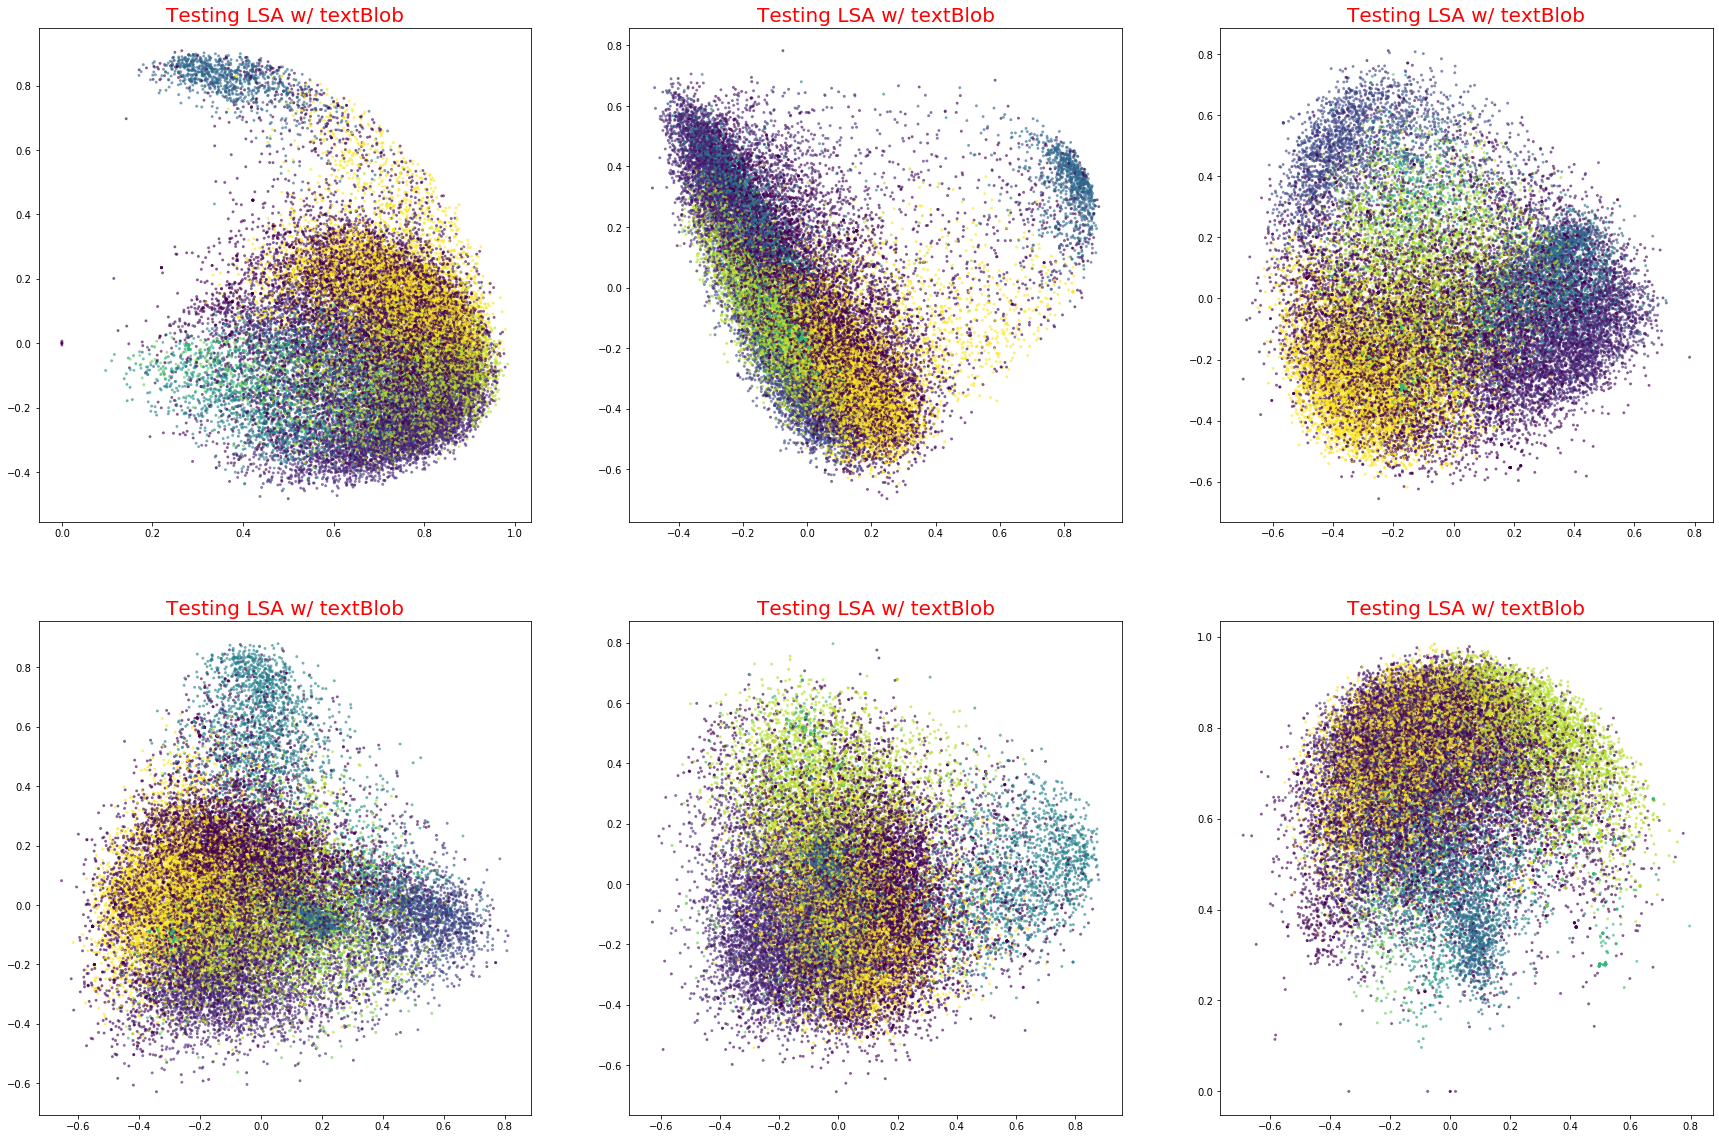

In [21]:
from sklearn.preprocessing import normalize

data_norm = normalize(data_dr)
plot_all_dimensions(data_norm[:,:6], labels, title="Testing LSA w/ textBlob")

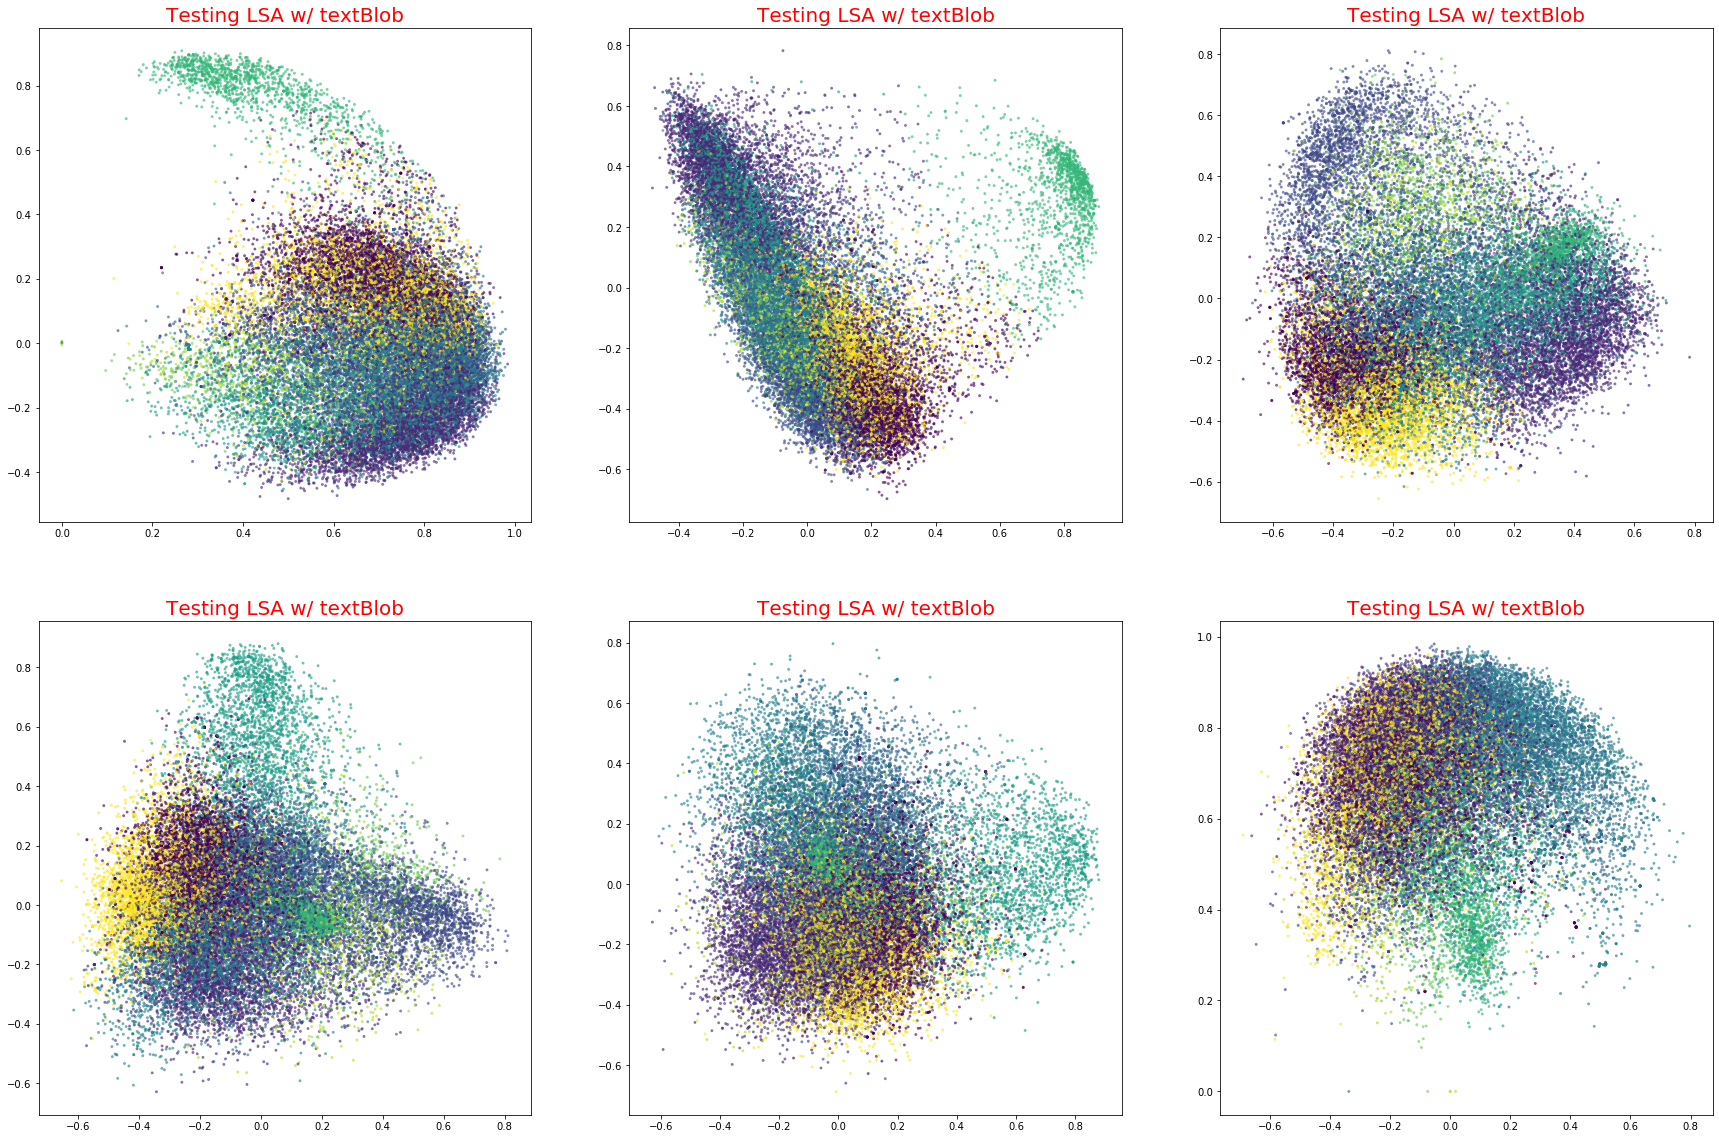

In [27]:
new_kmeans = KMeans(n_clusters=10, random_state=30)
new_kmeans.fit(data_norm)
new_labels = new_kmeans.labels_
plot_all_dimensions(data_norm[:,0:6], new_labels, title="Testing LSA w/ textBlob")

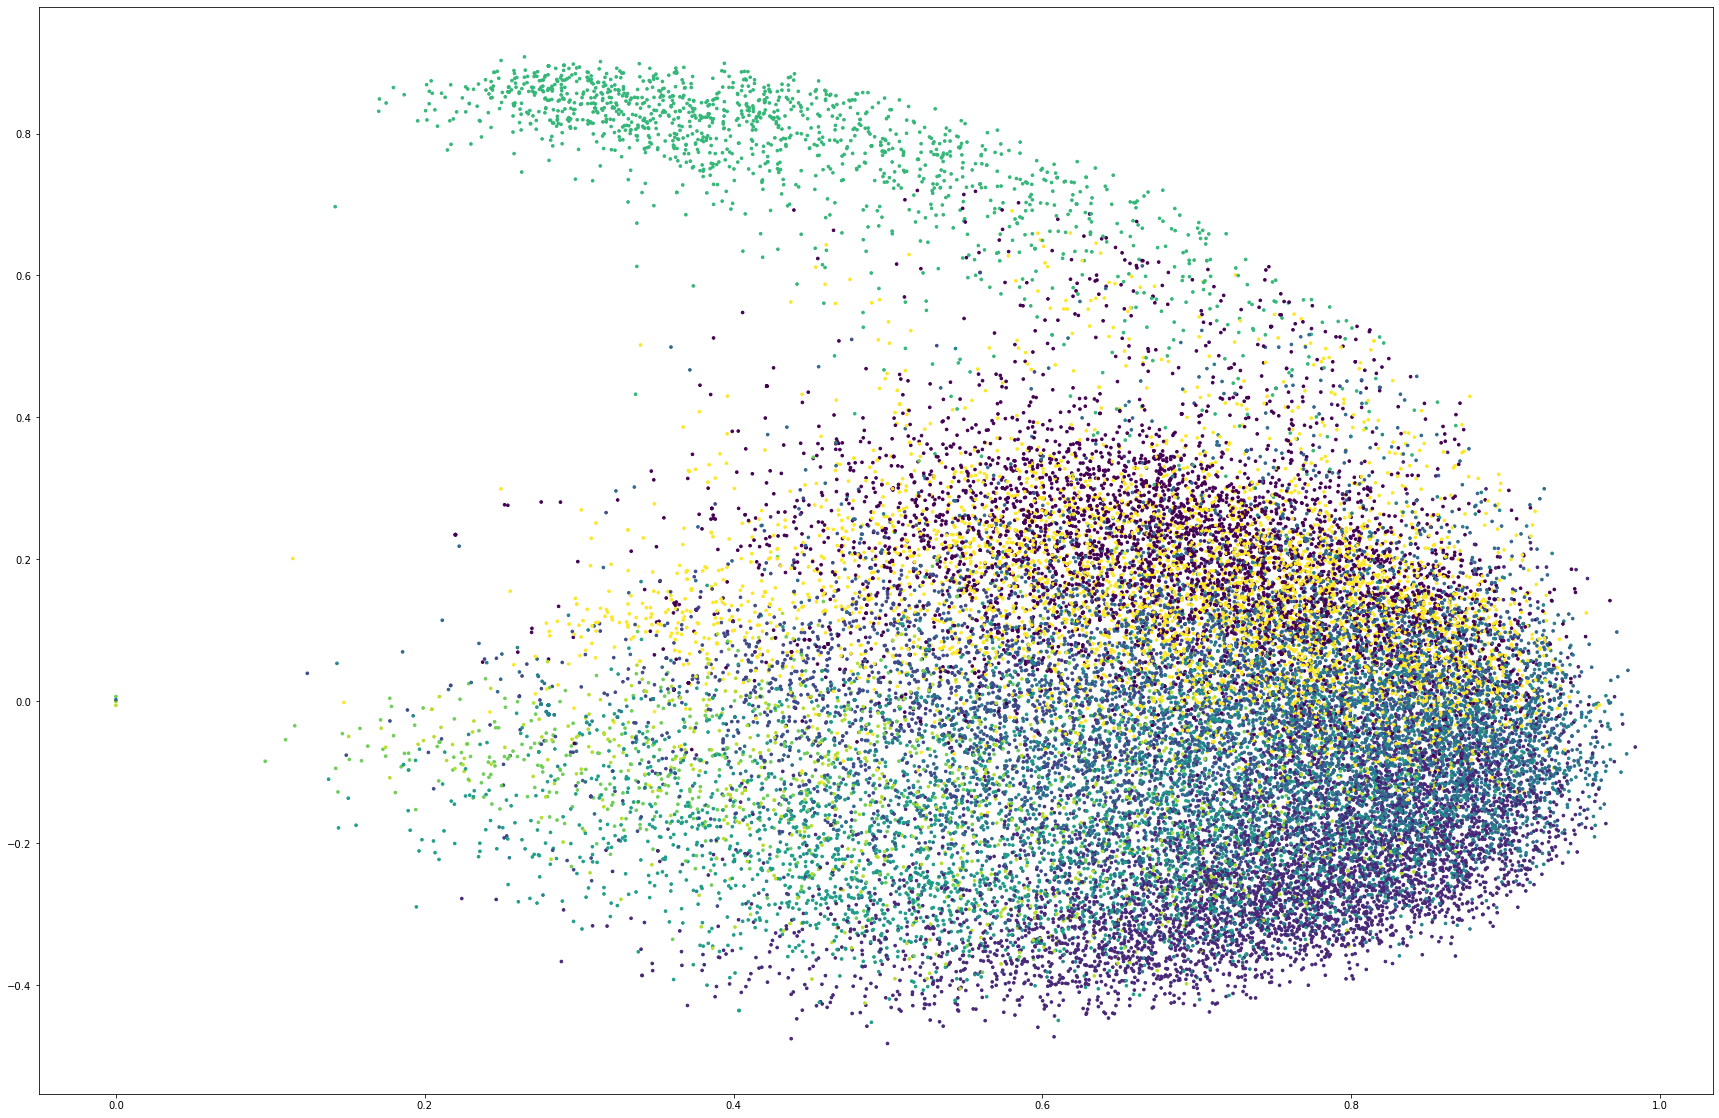

In [23]:
from sklearn import manifold
tsne_model = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne_desc_tfidf_lsa6 = tsne_model.fit_transform(data_norm)

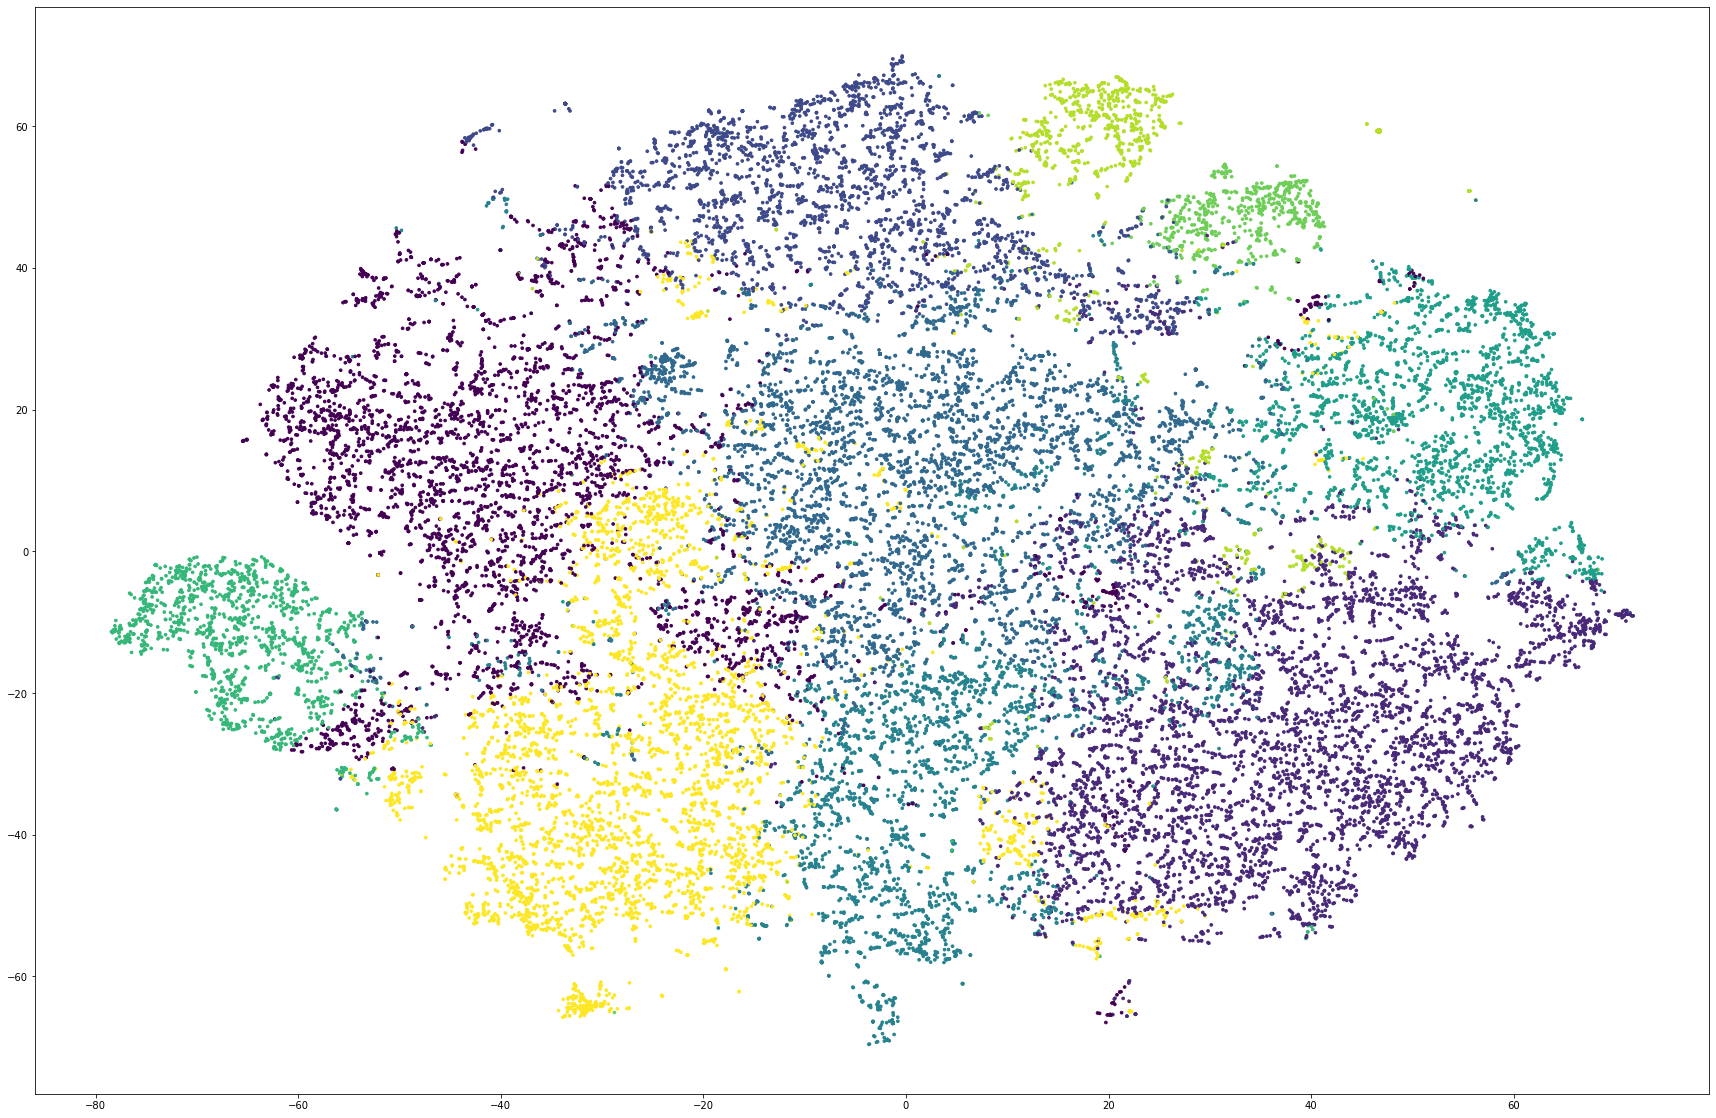

In [24]:
plt.scatter(tsne_desc_tfidf_lsa6[:,0], tsne_desc_tfidf_lsa6[:,1],
           s = 7, c=new_labels)

In [25]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

lsa_model = ckbks_test.objects['Dimensionality Reduction']
vect_words = ckbks_test.objects['Vectorization'].get_feature_names()
        
display_topics(lsa_model, vect_words, 30, topic_names=None)


Topic  0
cook, food, new, author, wine, chef, make, dish, time, includ, live, home, famili, kitchen, year, love, magazin, meal, work, best, ingredi, eat, use, easi, culinari, good, bake, delici, healthi, restaur

Topic  1
wine, magazin, award, writer, food, world, write, editor, wineri, live, travel, grape, york, author, winemak, guid, california, year, drink, work, new, region, spirit, beer, public, vineyard, histori, restaur, intern, univers

Topic  2
wine, dish, cake, soup, chicken, chocol, bake, bread, sauc, dessert, reed, cooki, chees, salad, make, cream, ingredi, use, pie, veget, minut, pasta, sweet, color, chapter, roast, cup, flavor, butter, tomato

Topic  3
health, diet, healthi, free, wine, gluten, nutrit, vegan, eat, weight, fat, low, help, meal, lifestyl, easi, delici, life, vegetarian, make, carb, diseas, diabet, bodi, peopl, enjoy, natur, sugar, fit, paleo

Topic  4
cake, cooki, bake, chocol, decor, bread, baker, pie, pastri, dessert, cupcak, gluten, live, treat, bar, su